In [ ]:
video link - 

# ELECTRIC VEHICLE DATA ANALYSIS PROJECT

In this project, We will analyze a dataset related to electric vehicles (EVs). The dataset contains various features 
such as electric range, energy consumption, price, and other relevantattributes.Our goal is to conduct a thorough analysis
to uncover meaningful insights, tell a compelling story, conduct hypothesis testing.

Importing required libraries for the Project

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Uploading the data set of the EV vehicles and checking the avialable details using the .head() function to get the overview of the data

In [6]:
ev_df = pd.read_excel("FEV-data-Excel.xlsx ")
ev_df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


## Task 1 : Filtering EV Dataset Based on Conditions

First lets start by filtering the EVs for a customer who has a budget of 350,000 PLN and he wants a minimum Range of EV to be 400 KM. 

In [9]:
""" Task 1 """
filter_data=ev_df[(ev_df["Minimal price (gross) [PLN]"] <= 350000) & (ev_df["Range (WLTP) [km]"] >= 400)] 
sorted_by_price = filter_data.sort_values(by=["Minimal price (gross) [PLN]"],ascending = False)
display(sorted_by_price)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,408,760,disc (front + rear),4WD,80.0,414,...,2940.0,445.0,5,5,19,180,500.0,5.1,110,21.85
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,NaN
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN
49,Volkswagen ID.4 1st,Volkswagen,ID.4 1st,202390,204,310,disc (front) + drum (rear),2WD (rear),77.0,500,...,2660.0,661.0,5,5,20,160,543.0,8.5,125,18.00
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,NaN,NaN,5,5,18,225,425.0,5.6,150,NaN
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,204,310,disc (front) + drum (rear),2WD (rear),77.0,549,...,2280.0,412.0,5,5,19,160,385.0,7.9,125,15.90
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90


Now we try to group the above filterd data for the customer based on the Manufacturer.

In [11]:
"""b) Group them by the manufacturer (Make)"""
group_by_make= filter_data.groupby("Make").agg(Cars_available=("Make","count"))
b=group_by_make.sort_values(by=["Cars_available"],ascending=False)
b

,Cars_available
Make,
Tesla,3
Volkswagen,3
Kia,2
Audi,1
BMW,1
Hyundai,1
Mercedes-Benz,1


From above we can see above customer specification there are <br>
3 Models available from Tesla<br>
3 Models available from Volkswagen<br>
2 models available fromm kia<br>
1 model each from Audi,BMW,Hyundai,Mercedes-Benz

Moving now we will try compare the Average Battery Capacity for above customer Requriments.

In [14]:
"""c) Calculate the average battery capacity for each manufacturer. """
avg_capacity_by_make = filter_data.groupby("Make").agg(Avg_battery_capacity=("Battery capacity [kWh]","mean"))
a=avg_capacity_by_make.sort_values(by=["Avg_battery_capacity"],ascending=False)
a

,Avg_battery_capacity
Make,
Audi,95.000000
BMW,80.000000
Mercedes-Benz,80.000000
Volkswagen,70.666667
Tesla,68.000000
Hyundai,64.000000
Kia,64.000000


We can see that based on the above cusotmer requirements the maximum battery capacity afforable is around 95 kWh from Audi and minimum of 64 Kwh from kia.

## Task 2:Finding outliers in mean - Energy consumption [kWh/100 km] Column.

Checking for the NUll values in the mean - Energy consumption [kWh/100 km] Column

In [18]:
null_values = ev_df["mean - Energy consumption [kWh/100 km]"].isnull().sum()
null_values

9

From above we can see there 9 Null values in our mean column which may effect the results which we are getting<br>so we try to remove this null values 
and use that Dataet for accurate analysis of outliers

In [20]:
mean_energy = ev_df.dropna()
mean_energy_2 = mean_energy["mean - Energy consumption [kWh/100 km]"]
null_values_1 = mean_energy_2.isnull().sum()
null_values_1

0

We can see Null Values Have been removed so we can proceed for our Outlier  Detection.

In [22]:
mean_energy_2.describe()

count    42.000000
mean     18.610714
std       4.134293
min      13.100000
25%      15.600000
50%      16.875000
75%      22.937500
max      27.550000
Name: mean - Energy consumption [kWh/100 km], dtype: float64

### Finding Outliers using IQR Method

The Interquartile Range (IQR) method is a popular technique for detecting outliers in a dataset.

Calculating q1,q3 and iqr values for outlier detection.

In [24]:
q1 = np.quantile(mean_energy_2,0.25)
q3 = np.quantile(mean_energy_2,0.75)
iqr=q3-q1
print(f"The q1 quartile range is:{q1}\nThe q3 quartile range is:{q3}\nThe iqr for the follwing dataset is:{iqr}")

The q1 quartile range is:15.6
The q3 quartile range is:22.9375
The iqr for the follwing dataset is:7.3375


Creating Upper and Lower bonds for outlier detection using q1,q3 and iqr values .

In [25]:
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(f"The iqr of follwing datset is {iqr},\nThe Upper bound of the dataset{upper_bound},\nThe Lower bound of the dataset{ lower_bound}")

The iqr of follwing datset is 7.3375,
The Upper bound of the dataset33.94375,
The Lower bound of the dataset4.593749999999998


Checking for outliers values in our mean energy Consumption.

In [26]:
outliers = mean_energy_2[(mean_energy_2 <= lower_bound) | (mean_energy_2>= upper_bound)]
print(f'The following are the outliers in the boxplot:\n{outliers}')

The following are the outliers in the boxplot:
Series([], Name: mean - Energy consumption [kWh/100 km], dtype: float64)


From the above IQR results we can see that there are no significant Ouliers in our Mean Energy Consumption

### Finding Outliers Using Boxplot Visualization

Finding the ouliers in the  mean energy compution to double Check our results.<br>For this Task we are choosing the 
Python in Built visualisation BOXPLOT which is extremely used to find ouliers in an dataset 
BOXPLOT creates the upper bond and lower bond and point out the data points which are outliers  in the dataset

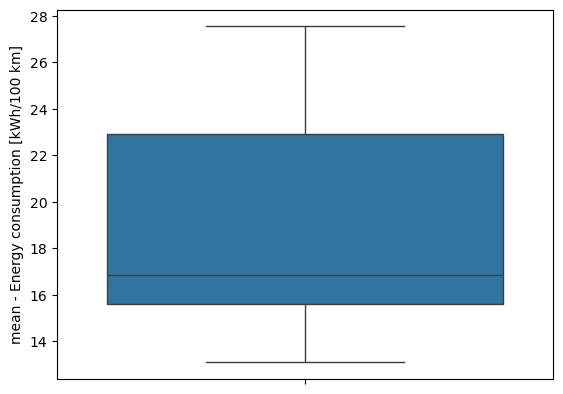

In [30]:
sns.boxplot(mean_energy_2)
plt.show()

From the above Boxplot Visualizationsn we can see that there are no significant Ouliers in our Mean Energy Consumption

## Task 3: Checking For Relationship between Baterry Capacity and Range

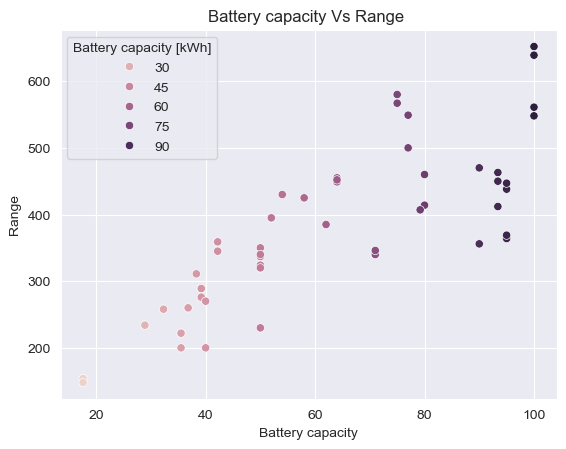

In [33]:
""" a) Create a suitable plot to visualize."""  
sns.set_style("darkgrid")
sns.scatterplot(x="Battery capacity [kWh]",y="Range (WLTP) [km]",data = ev_df,hue="Battery capacity [kWh]")
plt.title("Battery capacity Vs Range ")
plt.xlabel("Battery capacity")
plt.ylabel(" Range ")
plt.show()

From the above visual we can see that there is a linear realtionship betweeen the Batter Capacity of the EV and Range Of the EV<br>
which means the EV models with Higher Battery Capcity are providing the higher Ranges and <br>EV models with lower Battery Capacity are Providing Lower Ranges

###  Models Manufactured by Each Company

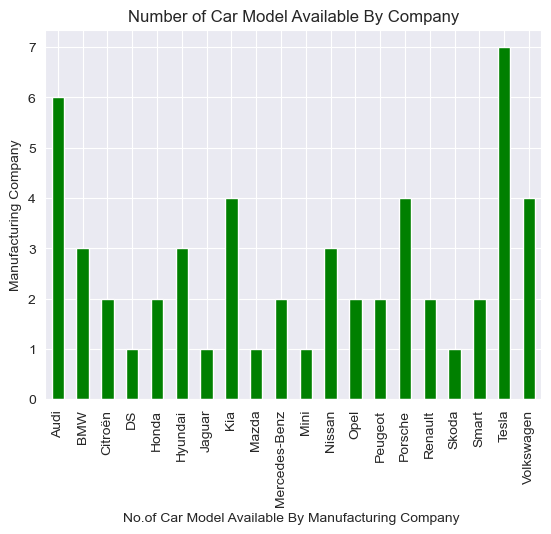

In [36]:
""" b) Highlight any insights."""
Cars_by_company=ev_df.groupby("Make")["Make"].count()
Cars_by_company
Cars_by_company.plot(kind="bar",color="Green")
plt.title("Number of Car Model Available By Company")
plt.xlabel("No.of Car Model Available By Manufacturing Company ")
plt.ylabel("Manufacturing Company")
plt.show()

From the above visual we can see the most number of models from a single company are<br>
7 Models from Tesla <br>
6 Models from Audi <br>
4 Models from 3 Companies -Kia,Porsche,Volkswagen<br>
3 models from 3 MCompanies - BMW,Hyundai,Nissan<br>
2 models from 6 Companies -Citroen,Honda,Opel,Peugeot,Renault,Smart<br>
1 Models from 5 Companies - Skoda,jaguar,Ds,Mini and Mazda <br>


### Relationhip Between Acceleration and Engine Power

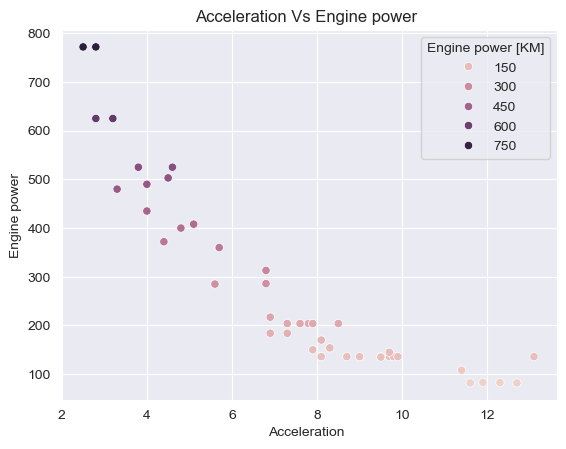

In [39]:
sns.set_style("darkgrid")
sns.scatterplot(x="Acceleration 0-100 kph [s]",y="Engine power [KM]",data = ev_df,hue="Engine power [KM]")
plt.title("Acceleration Vs Engine power ")
plt.xlabel("Acceleration ")
plt.ylabel("Engine power")
plt.show()

Now we are trying to see the relationship between the Accerelation and Engine power<br>
we can see the the model with the higher engine power are taking less time to accelerate means having Higher acceleration rate<br>
we can see the the model with the lower engine power are taking more time to accelerate means having Lower acceleration rate<br>

### Relationhip Between Acceleration and Mean Energy Consumption[kWh/100 km]

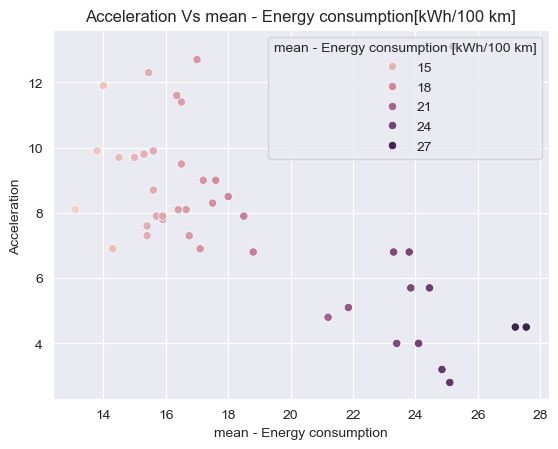

In [42]:
sns.set_style("darkgrid")
sns.scatterplot(y="Acceleration 0-100 kph [s]",x="mean - Energy consumption [kWh/100 km]",data = ev_df,hue="mean - Energy consumption [kWh/100 km]")
plt.title("Acceleration Vs mean - Energy consumption[kWh/100 km]")
plt.ylabel("Acceleration ")
plt.xlabel("mean - Energy consumption")
plt.show()

Now we are trying to see the relationship between the Accerelation and Mean Energy Consumption<br>
we can see the the model having Higher acceleration rate means taking less time to reach 0-100kph are consuming more Energy per 100 km<br>
we can see the the model having Lower acceleration rate means taking less time to reach 0-100kph are consuming less Energy per 100 km<br>

## Task 4: Build an EV Recommendation Class

For this Task we assigned to make EV Recommendation Class Where the user inputs his specific Budget Allocation, Desired Range, Battery capacity 
he requires. <br>Then we will Return him the top 3 EV's based on His desired Inputs:


In [46]:
""" Task 4"""

class ev_recommendation:
    def __init__(self,budget,range_km,battery_capacity):
        self.budget = budget
        self.range_km = range_km
        self.battery_capacity = battery_capacity
        print(f"Your budget Allocation : {self.budget}\nYour Desired Range:  {self.range_km}\nBattery Capacity Required:  {self.battery_capacity}")
        
        if self.budget==0:
             print("Enter Valid Budget")
        elif self.range_km == 0:
            print("Enter Valid Range")
        elif self.battery_capacity == 0:
            print("Enter Valid Battery Capacity")
        else:
            print("The Top Three EV with in given parameters")
            ev_with_in_range=ev_df[(ev_df["Range (WLTP) [km]"]< self.range_km) & (ev_df["Battery capacity [kWh]"] < self.battery_capacity) & (ev_df["Minimal price (gross) [PLN]"] <=self.budget)]
            top_3_range =ev_with_in_range.nlargest(3,["Range (WLTP) [km]"])
            display("Top 3 Based On Your Desired Range:",top_3_range)
            top_3_battery=ev_with_in_range.nlargest(3,["Minimal price (gross) [PLN]"])
            display("Top 3 Based On Your Desired Budget:",top_3_battery)
            top_3_budget=ev_with_in_range.nlargest(3,["Battery capacity [kWh]"])
            display("Top 3 Based On Your Battery Capacity Required:",top_3_budget)

### User Based Inputs will we given Here

In [48]:
#first input in budget second input is range third input is Battery Capacity
ev_recommendation(400000,500,80)

Your budget Allocation : 400000
Your Desired Range:  500
Battery Capacity Required:  80
The Top Three EV with in given parameters


'Top 3 Based On Your Desired Range:'

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.9
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.7
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.4


'Top 3 Based On Your Desired Budget:'

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.3
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.8
50,Citroën ë-Spacetourer (M),Citroën,ë-Spacetourer (M),215400,136,260,disc (front + rear),2WD (front),50.0,230,...,2810.0,1056.0,8,5,16,130,603.0,13.1,100,25.2


'Top 3 Based On Your Battery Capacity Required:'

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.8
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.3
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.4


## Task 5: Inferential Statistics 

We are assigned to test whether there is significant difference between the average Engine power [KM] of vehicles  manufactured by two leading manufacturers i.e.Tesla and Audi.<br> 
For testing we are going to use hypothese testing first lets start with our<br>                                                                         Null Hypothesis (H0)     =  There is no siginificant Relationship between the mean engine power of two manufacturers Tesla andd Audi.<br>            ALternate Hypothesis(H1) =  There is a significant relationship between the mean engine power of two manufacturers Tesla andd Audi.<br>                 Lets start with preparing our Two sample datasets consisting of engine power of Tesla and Audi


### Preparation our Two sample datasets consisting of engine power of Tesla and Audi

Filtering the two datasets of Tesla and Audi from EV dataset.

In [53]:
"""Task 5: """

tesla = ev_df[ev_df["Make"] == "Tesla"]
display(tesla.head(4))

audi= ev_df[ev_df["Make"] == "Audi"]
display(audi.head(4))


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,NaN,NaN,5,5,18,225,425.0,5.6,150,NaN
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,NaN
42,Tesla Model S Long Range Plus,Tesla,Model S Long Range Plus,368990,525,755,disc (front + rear),4WD,100.0,652,...,NaN,NaN,5,5,19,250,745.0,3.8,150,NaN


,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30


### Creating and Checking The Two Sample Datasets for any error and null values

In this phase we try to create the sample datasets For Hypothesis Testing for Engine Power

In [56]:
tesla_engine=tesla[["Engine power [KM]"]]
display(tesla_engine)
audi_engine = audi[["Engine power [KM]"]]
display(audi_engine)

,Engine power [KM]
39,285
40,372
41,480
42,525
43,772
44,525
45,772


,Engine power [KM]
0,360
1,313
2,503
3,313
4,360
5,503


We can see there are no null values and erroe so we can proceed with this data for Hypothesis testing.<br>
The two sample datasets are small and independent datasets so we can go ahead with the Two Sample T Test

### Checking the Variences Of the Sample Datasets

To Conduct Two sample T test First of all we have check the varience of the Two Sample datasets 

In [60]:
tesla_var = np.var(tesla["Engine power [KM]"])
audi_var = np.var(audi["Engine power [KM]"])
print("The Varience of Tesla Dataset:",tesla_var,"\nThe Varience of Audi Dataset:",audi_var)

The Varience of Tesla Dataset: 29229.14285714286 
The Varience of Audi Dataset: 6528.666666666667


We can see ther differene between ratio of the two datasets is Greater than 4:1

### Performing Two Sample T Test

Now with the Sample datasts ready and variences is known we conduct the Two Sample T test

In [64]:
statistic,p_value=stats.ttest_ind(tesla_engine,audi_engine,equal_var=False)#varience not in raio of 4:1
print("The Two Sample T test Results:")
print(f"T Statistic:{statistic}")
print(f"P-Value:{p_value}")

The Two Sample T test Results:
T Statistic:[1.79399518]
P-Value:[0.10684105]


### Interpreting the T- Test Results 

Based on the P value of 0.10684105 from the Two Sample T-Tet we can verifying the Hyothesis we made.<br>
we are Taking Significance level(alpha) =0.05(confidence level of 95%)

In [67]:
alpha = 0.05
if p_value < 0.05:
    print("We Reject The Null Hypothesis.There is a signigicant Difference between both Tesla and Audi Mean Energy Power")
else:
    print("We Fail to Reject the NUll Hypotheses Means\nWe do not have sufficient evidence to say that the mean Engine Power between the two data groups Tesla and Audi is different.") 

We Fail to Reject the NUll Hypotheses Means
We do not have sufficient evidence to say that the mean Engine Power between the two data groups Tesla and Audi is different.


Here, since the p-value (0.10684105) is greater than alpha = 0.05 so we cannot reject the null hypothesis of the test.<br> We do not have sufficient evidence to say that the mean Engine Power between the two data groups Tesla and Audi is different.